In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kolusurenuka","key":"23a3b17228e15606c1828eb7c6878e79"}'}

In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

/bin/bash: line 1: mkdir~/.kaggle: No such file or directory
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:20<00:00, 169MB/s]
100% 2.29G/2.29G [00:20<00:00, 122MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip && rm chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
!pip install --upgrade pip
!pip install -q evaluate transformers datasets mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

import tensorflow as tf
from transformers import ViTFeatureExtractor, TFAutoModelForImageClassification
from sklearn.model_selection import train_test_split


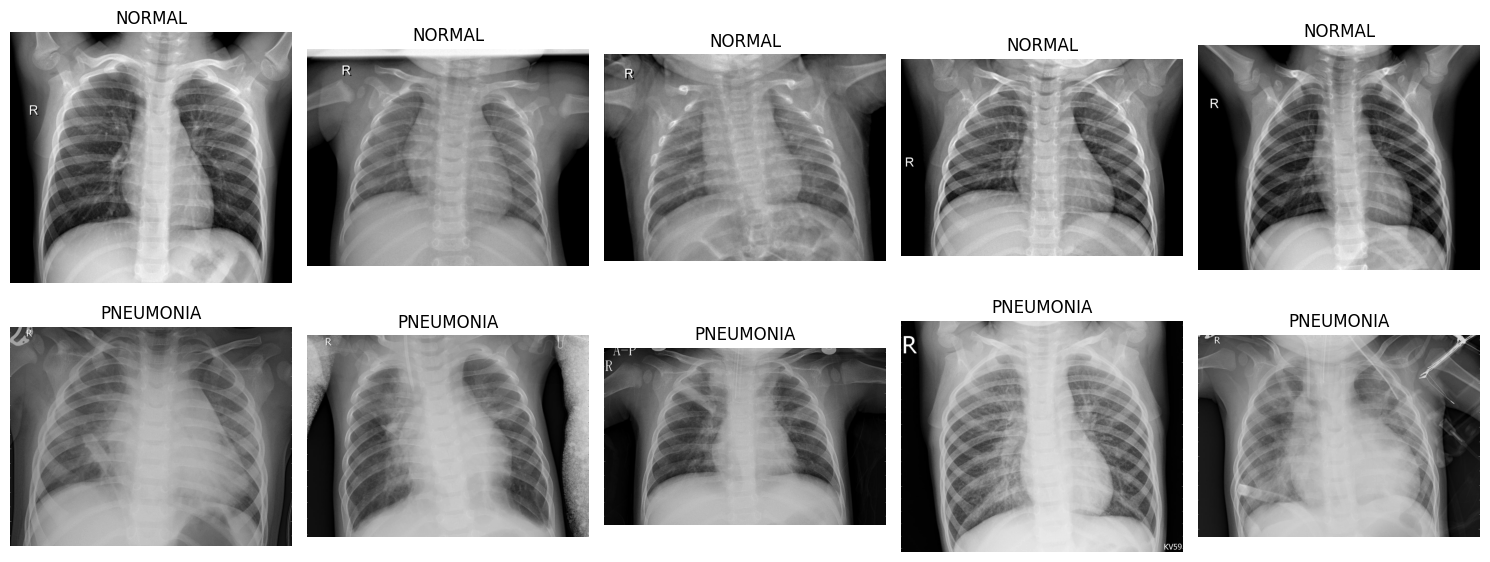

In [ ]:
# Directory paths
train_dir = Path("/content/chest_xray/train")
val_dir = Path("/content/chest_xray/val")
test_dir = Path("/content/chest_xray/test")

# Displaying a few images
def display_images(folder, num=5):
    pneumonia_imgs = list(folder.glob('PNEUMONIA/*.jpeg'))[:num]
    normal_imgs = list(folder.glob('NORMAL/*.jpeg'))[:num]

    fig, axes = plt.subplots(nrows=2, ncols=num, figsize=(15, 6))

    for i, img_path in enumerate(normal_imgs):
        img = Image.open(img_path)
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title("NORMAL")
        axes[0, i].axis('off')

    for i, img_path in enumerate(pneumonia_imgs):
        img = Image.open(img_path)
        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title("PNEUMONIA")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

display_images(train_dir)


In [ ]:
from torchvision import transforms

# Define transformations for the training, validation, and testing sets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
label_mapping = {"NORMAL": 0, "PNEUMONIA": 1}


In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Creating datasets
train_dataset = ImageFolder(train_dir, transform=train_transforms)
val_dataset = ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = ImageFolder(test_dir, transform=val_test_transforms)

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
from transformers import ViTForImageClassification, ViTConfig, ViTImageProcessor

# Define the ViT configuration
config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")
config.num_labels = 2  # Normal and Pneumonia

# Load the pre-trained model
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", config=config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
import torch
import torch.nn as nn

# Check for GPU availability and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses = []  # List to store training loss for each epoch
    val_accuracies = []  # List to store validation accuracy for each epoch

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images).logits  # Get logits from model outputs
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_train_loss = running_loss / len(train_loader.dataset)
        val_accuracy = 100 * correct / total

        # Append the computed values to their respective lists
        train_losses.append(avg_train_loss)
        val_accuracies.append(val_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    return model, train_losses, val_accuracies


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
trained_model, train_losses, val_accuracies = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)


Epoch 1/10, Loss: 0.2233, Validation Accuracy: 68.75%
Epoch 2/10, Loss: 0.0754, Validation Accuracy: 87.50%
Epoch 3/10, Loss: 0.0630, Validation Accuracy: 87.50%
Epoch 4/10, Loss: 0.0504, Validation Accuracy: 68.75%
Epoch 5/10, Loss: 0.0473, Validation Accuracy: 62.50%
Epoch 6/10, Loss: 0.0325, Validation Accuracy: 87.50%
Epoch 7/10, Loss: 0.0328, Validation Accuracy: 93.75%
Epoch 8/10, Loss: 0.0255, Validation Accuracy: 93.75%
Epoch 9/10, Loss: 0.0242, Validation Accuracy: 87.50%
Epoch 10/10, Loss: 0.0238, Validation Accuracy: 87.50%


In [ ]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    return test_accuracy

original_accuracy=evaluate_model(trained_model, test_loader)
original_accuracy

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

batch_size = 32
summary(trained_model, input_size=(batch_size, 3, 224, 224))

In [ ]:
display_images(train_dir)


In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()

        # Training Phase
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        avg_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation Phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    return model, train_losses, val_accuracies


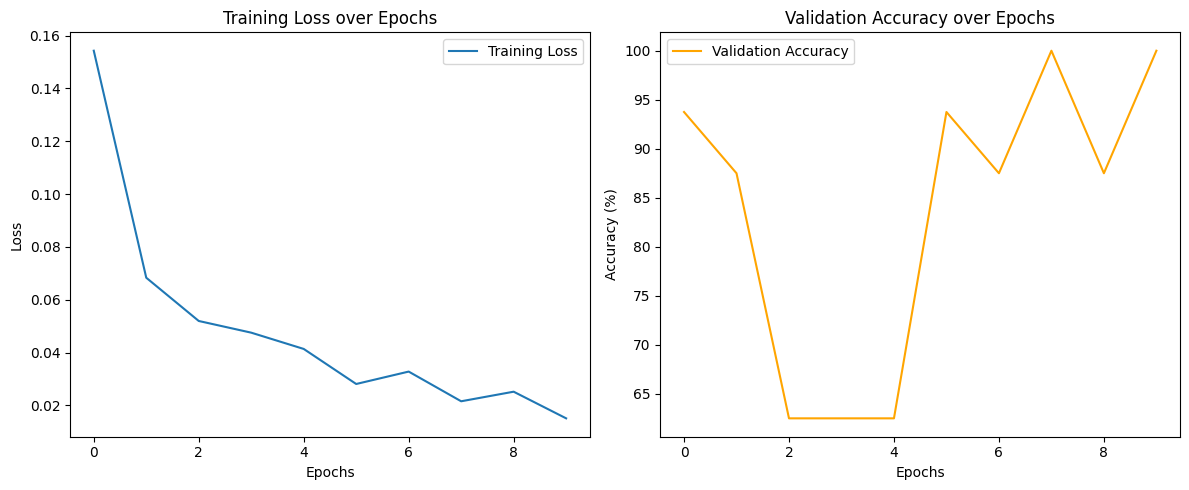

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


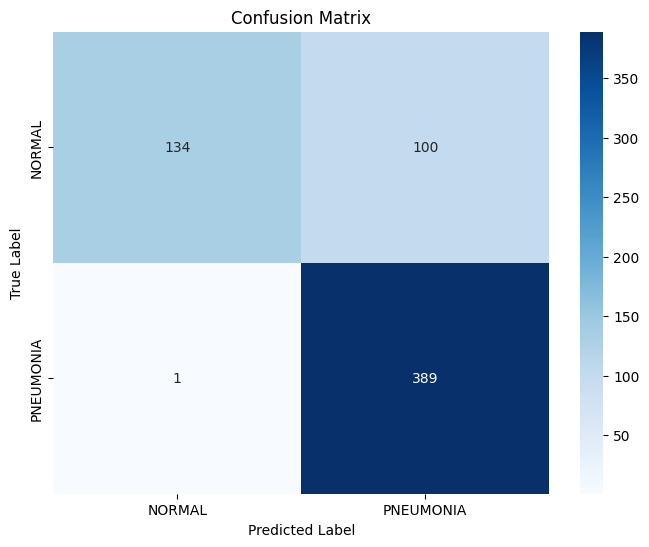

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Getting the true labels and the predicted labels
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Now, we'll plot the confusion matrix
labels_list = ["NORMAL", "PNEUMONIA"]
plot_confusion_matrix(y_true, y_pred, labels_list)


In [ ]:
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from time import time
import copy
import pandas as pd

In [ ]:
!pip install regex
import re

In [ ]:
model_prune=trained_model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
def prune_vit(model,percent):
  parameters_to_prune = []

  for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
      parameters_to_prune.append((module, 'weight'))
  prune.global_unstructured(
      parameters_to_prune,
      pruning_method=prune.L1Unstructured,
      amount=percent,
  )


  return model


In [ ]:
pruned_model = prune_vit(model_prune,0.1)

In [ ]:
evaluate_model(pruned_model, test_loader)

62.5

In [ ]:
from torchinfo import summary

batch_size = 32
summary(pruned_model, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                                  Output Shape              Param #
ViTForImageClassification                               [32, 2]                   --
├─ViTModel: 1-1                                         [32, 197, 768]            --
│    └─ViTEmbeddings: 2-1                               [32, 197, 768]            152,064
│    │    └─ViTPatchEmbeddings: 3-1                     [32, 196, 768]            590,592
│    │    └─Dropout: 3-2                                [32, 197, 768]            --
│    └─ViTEncoder: 2-2                                  [32, 197, 768]            --
│    │    └─ModuleList: 3-3                             --                        1,333,410
│    └─LayerNorm: 2-3                                   [32, 197, 768]            1,536
├─Linear: 1-2                                           [32, 2]                   2
Total params: 2,077,604
Trainable params: 2,077,604
Non-trainable params: 0
Total mult-adds (G): 3.75
Input size (MB): 19.27
F

In [ ]:
pruning_percent = [0, 0.10,0.25,0.30,0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.97, 0.99]
accuracy_pruning = []
for percent in pruning_percent:
    accuracy_pruning.append(evaluate_model(prune_vit(model_prune, percent), test_loader))


In [ ]:
accuracy_pruning

[65.5448717948718,
 38.62179487179487,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
from pylab import rcParams
import copy
import time
%matplotlib inline
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy], 'r',
         pruning_percent, accuracy_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'],
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
import torch
torch.cuda.empty_cache()  # Clears cached memory


In [ ]:
model_prune1=trained_model

In [ ]:
import copy
def weight_prune(model, pruning_percentage):
    model1 = copy.deepcopy(model)
    length = len(list(model1.parameters()))
    for i, param in enumerate(model1.parameters()):
        if len(param.size())!=1 and i<length-2:
            weight = param.detach().cpu().numpy()
            weight[np.abs(weight)<np.percentile(np.abs(weight), pruning_percentage)] = 0
            weight = torch.from_numpy(weight).to(device)
            param.data = weight
    return model1

pruning_percent = [0, 10,25,30,40, 50, 60, 70, 80, 90, 95, 97, 99]


In [ ]:
pruning_percent = [0, 10, 25, 30, 40, 50, 60, 70, 80, 90, 95, 97, 99]
accuracy_weight_pruning = []
for percent in pruning_percent:
    accuracy_weight_pruning.append(evaluate_model(weight_prune(model_prune, percent), test_loader))


In [ ]:
accuracy_weight_pruning

[83.81410256410257,
 83.97435897435898,
 83.97435897435898,
 83.97435897435898,
 83.49358974358974,
 80.76923076923077,
 72.43589743589743,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
from pylab import rcParams
import copy
import time
%matplotlib inline

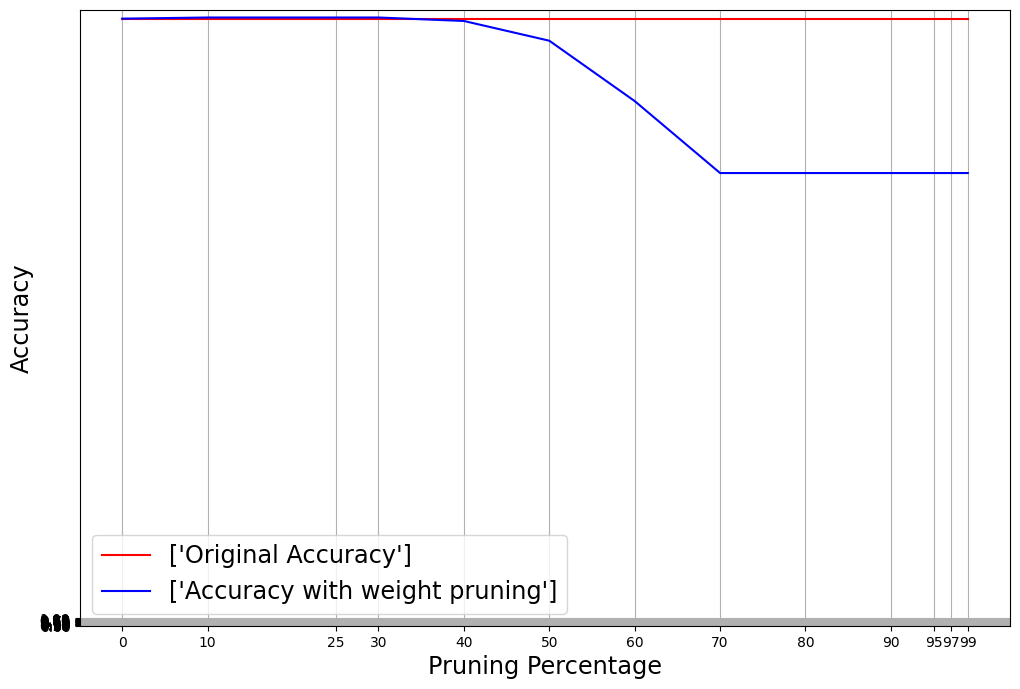

In [ ]:
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'],
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
import copy
import numpy as np
import torch

def neuron_pruning(model, pruning_percentage):
    model1 = copy.deepcopy(model)  # Create a deep copy of the model
    length = len(list(model1.parameters()))  # Get the number of parameters

    # Iterate over model parameters
    for i, param in enumerate(model1.parameters()):
        # Consider only multi-dimensional parameters, excluding last two
        if len(param.size()) > 1 and i < length - 2:
            weight = param.detach().cpu().numpy()  # Convert to numpy
            norm = np.linalg.norm(weight, axis=0)  # Calculate norm along axis 0

            # If there's only one row/column, skip or handle appropriately
            if weight.shape[0] == 1 or weight.shape[1] == 1:
                continue  # Skip if indexing would cause out-of-bounds error

            # Obtain indices for pruning and validate
            indices = np.argwhere(norm < np.percentile(norm, pruning_percentage)).flatten()

            # Validate indices to avoid out-of-bounds errors
            if indices.size > 0 and np.any(indices >= weight.shape[1]):
                continue  # Skip if indices are out of bounds

            # Zero out weights at specified indices
            weight[:, indices] = 0  # Apply pruning by setting weights to zero

            # Convert back to PyTorch and update parameter data
            weight = torch.from_numpy(weight).to(device)
            param.data = weight  # Assign updated weights back to parameter

    return model1  # Return the pruned model


In [ ]:
accuracy_neuron_pruning = []
for percent in pruning_percent:
    accuracy_neuron_pruning.append(evaluate_model(neuron_pruning(model_prune, percent), test_loader))

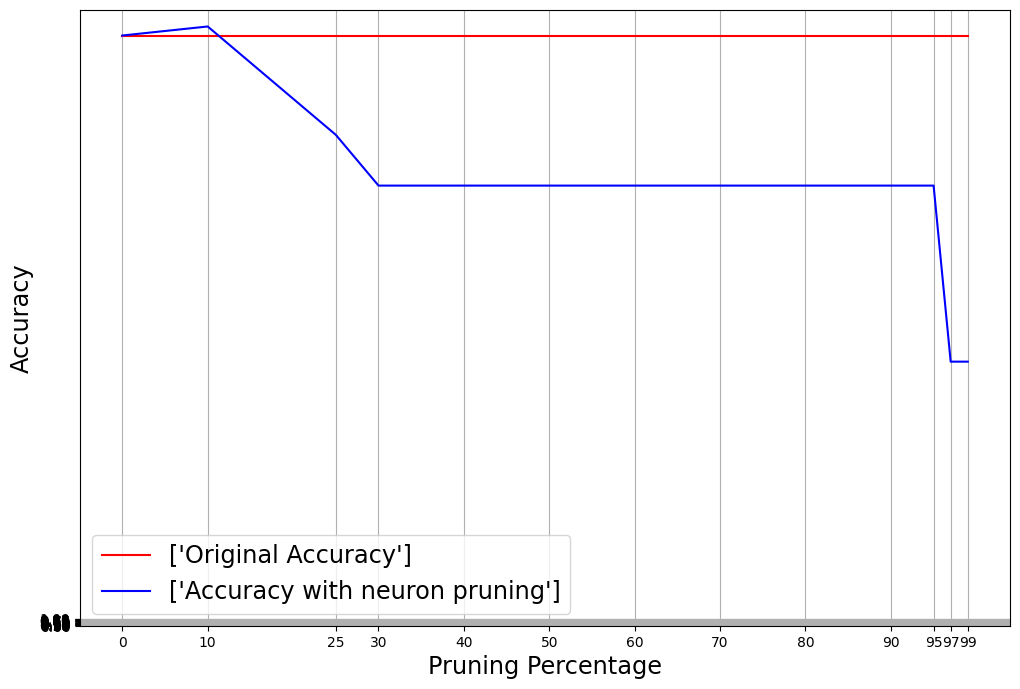

In [ ]:
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy], 'r', pruning_percent, accuracy_neuron_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'], ['Accuracy with neuron pruning']], loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
accuracy_neuron_pruning

[83.81410256410257,
 85.09615384615384,
 69.71153846153847,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 37.5,
 37.5]

----------------------------


# **efficientnet**

In [ ]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.CenterCrop(180),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))])

transform_test = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.CenterCrop(180),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))])

In [ ]:
from torchvision.datasets import ImageFolder

dataset_train = ImageFolder(root=train_dir, transform=transform_train)
dataset_valid = ImageFolder(root=val_dir, transform=transform_test)
from torch.utils.data import DataLoader

batch_size = 8

loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)
loader_valid = DataLoader(dataset=dataset_valid, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
!pip install efficientnet-pytorch==0.7.1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00
  Cr

In [ ]:
model_list = []

In [ ]:
from efficientnet_pytorch import EfficientNet

efficientnet_b1 = EfficientNet.from_pretrained('efficientnet-b1', num_classes=2)
efficientnet_b2 = EfficientNet.from_pretrained('efficientnet-b2', num_classes=2)
efficientnet_b3 = EfficientNet.from_pretrained('efficientnet-b3', num_classes=2)

efficientnet_b1 = efficientnet_b1.to(device)
efficientnet_b2 = efficientnet_b2.to(device)
efficientnet_b3 = efficientnet_b3.to(device)

model_list.append(efficientnet_b1)
model_list.append(efficientnet_b2)
model_list.append(efficientnet_b3)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 279MB/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth


Loaded pretrained weights for efficientnet-b1


100%|██████████| 35.1M/35.1M [00:00<00:00, 286MB/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth


Loaded pretrained weights for efficientnet-b2


100%|██████████| 47.1M/47.1M [00:00<00:00, 53.5MB/s]


Loaded pretrained weights for efficientnet-b3


In [ ]:
for idx, model in enumerate(model_list):
    num_params = sum(param.numel() for param in model.parameters())
    print(f'number of parameters of model {idx+1}: {num_params}')

number of parameters of model 1: 6515746
number of parameters of model 2: 7703812
number of parameters of model 3: 10699306


In [ ]:
print('number of parameters: ', sum(param.numel() for param in model.parameters()))

number of parameters:  10699306


In [ ]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer1 = torch.optim.AdamW(model_list[0].parameters(), lr=0.0006, weight_decay=0.001)
optimizer2 = torch.optim.AdamW(model_list[1].parameters(), lr=0.0006, weight_decay=0.001)
optimizer3 = torch.optim.AdamW(model_list[2].parameters(), lr=0.0006, weight_decay=0.001)

In [ ]:
from transformers import get_cosine_schedule_with_warmup

epochs = 10

scheduler1 = get_cosine_schedule_with_warmup(optimizer1,
                                            num_warmup_steps=len(loader_train)*3,
                                            num_training_steps=len(loader_train)*epochs)

scheduler2 = get_cosine_schedule_with_warmup(optimizer2,
                                            num_warmup_steps=len(loader_train)*3,
                                            num_training_steps=len(loader_train)*epochs)

scheduler3 = get_cosine_schedule_with_warmup(optimizer3,
                                            num_warmup_steps=len(loader_train)*3,
                                            num_training_steps=len(loader_train)*epochs)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm


def train(model, loader_train, loader_valid, criterion, optimizer, scheduler=None, epochs=10, save_file='model_state_dict.pth'):

    valid_loss_min = np.inf

    for epoch in range(epochs):

        print(f'epoch [{epoch+1}/{epochs}] \n ------------------------')

        model.train()
        epoch_train_loss = 0

        for images, labels in tqdm(loader_train):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_train_loss += loss.item()
            loss.backward()
            optimizer.step()
            if scheduler != None:
                scheduler.step()

        print(f'train loss: {epoch_train_loss/len(loader_train):.4f}')

        model.eval()
        epoch_valid_loss = 0
        preds_list = []
        true_list = []

        with torch.no_grad():
            for images, labels in loader_valid:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                epoch_valid_loss += loss.item()

                preds = torch.max(outputs.cpu(), dim=1)[1].numpy()
                true = labels.cpu().numpy()

                preds_list.extend(preds)
                true_list.extend(true)

        print(f'valid loss: {epoch_valid_loss/len(loader_valid):.4f}')

        val_accuracy = accuracy_score(true_list, preds_list)
        val_recall = recall_score(true_list, preds_list)
        val_f1_score = f1_score(true_list, preds_list)

        print(f'accuracy: {val_accuracy:.4f} / recall: {val_recall:.4f} / f1 score: {val_f1_score:.4f}')

        if epoch_valid_loss <= valid_loss_min:
            print(f'current valid loss min: {valid_loss_min:.4f} --> {epoch_valid_loss:.4f} model save')

            torch.save(model.state_dict(), save_file)
            valid_loss_min = epoch_valid_loss

    return torch.load(save_file)

In [ ]:
model_state_dict = train(model=model_list[0],
                        loader_train=loader_train,
                        loader_valid=loader_valid,
                        criterion=criterion,
                        optimizer=optimizer1,
                        scheduler=scheduler1,
                        epochs=epochs)

model_list[0].load_state_dict(model_state_dict)

epoch [1/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.3074
valid loss: 1.8581
accuracy: 0.6250 / recall: 1.0000 / f1 score: 0.7273
current valid loss min: inf --> 3.7161 model save
epoch [2/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1479
valid loss: 1.9791
accuracy: 0.6250 / recall: 1.0000 / f1 score: 0.7273
epoch [3/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1235
valid loss: 0.7603
accuracy: 0.7500 / recall: 1.0000 / f1 score: 0.8000
current valid loss min: 3.7161 --> 1.5205 model save
epoch [4/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0972
valid loss: 0.9555
accuracy: 0.6875 / recall: 1.0000 / f1 score: 0.7619
epoch [5/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0837
valid loss: 2.8594
accuracy: 0.5625 / recall: 1.0000 / f1 score: 0.6957
epoch [6/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0749
valid loss: 0.1544
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412
current valid loss min: 1.5205 --> 0.3088 model save
epoch [7/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0466
valid loss: 0.8524
accuracy: 0.6250 / recall: 1.0000 / f1 score: 0.7273
epoch [8/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0400
valid loss: 0.1660
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000
epoch [9/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0243
valid loss: 0.1608
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412
epoch [10/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0205
valid loss: 0.1197
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412
current valid loss min: 0.3088 --> 0.2394 model save


<All keys matched successfully>

In [ ]:
model_state_dict = train(model=model_list[1],
                        loader_train=loader_train,
                        loader_valid=loader_valid,
                        criterion=criterion,
                        optimizer=optimizer2,
                        scheduler=scheduler2,
                        epochs=epochs)

model_list[1].load_state_dict(model_state_dict)

epoch [1/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.2997
valid loss: 1.2294
accuracy: 0.5625 / recall: 1.0000 / f1 score: 0.6957
current valid loss min: inf --> 2.4588 model save
epoch [2/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1354
valid loss: 1.7527
accuracy: 0.5625 / recall: 1.0000 / f1 score: 0.6957
epoch [3/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1300
valid loss: 0.2612
accuracy: 0.8750 / recall: 1.0000 / f1 score: 0.8889
current valid loss min: 2.4588 --> 0.5225 model save
epoch [4/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1114
valid loss: 0.2480
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412
current valid loss min: 0.5225 --> 0.4959 model save
epoch [5/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0817
valid loss: 0.2204
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000
current valid loss min: 0.4959 --> 0.4408 model save
epoch [6/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0572
valid loss: 0.8931
accuracy: 0.6250 / recall: 1.0000 / f1 score: 0.7273
epoch [7/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0538
valid loss: 0.1711
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000
current valid loss min: 0.4408 --> 0.3421 model save
epoch [8/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0343
valid loss: 0.1961
accuracy: 0.8750 / recall: 1.0000 / f1 score: 0.8889
epoch [9/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0260
valid loss: 0.0543
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000
current valid loss min: 0.3421 --> 0.1086 model save
epoch [10/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0191
valid loss: 0.0566
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000


<All keys matched successfully>

In [ ]:
model_state_dict = train(model=model_list[2],
                        loader_train=loader_train,
                        loader_valid=loader_valid,
                        criterion=criterion,
                        optimizer=optimizer3,
                        scheduler=scheduler3,
                        epochs=epochs)

model_list[2].load_state_dict(model_state_dict)

epoch [1/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.2799
valid loss: 1.6313
accuracy: 0.5625 / recall: 1.0000 / f1 score: 0.6957
current valid loss min: inf --> 3.2627 model save
epoch [2/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1435
valid loss: 0.1130
accuracy: 0.8750 / recall: 0.7500 / f1 score: 0.8571
current valid loss min: 3.2627 --> 0.2261 model save
epoch [3/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1174
valid loss: 0.3388
accuracy: 0.8125 / recall: 1.0000 / f1 score: 0.8421
epoch [4/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.1112
valid loss: 0.6529
accuracy: 0.7500 / recall: 1.0000 / f1 score: 0.8000
epoch [5/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0881
valid loss: 0.3570
accuracy: 0.7500 / recall: 1.0000 / f1 score: 0.8000
epoch [6/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0684
valid loss: 0.2239
accuracy: 0.8750 / recall: 1.0000 / f1 score: 0.8889
epoch [7/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0467
valid loss: 0.6968
accuracy: 0.6250 / recall: 1.0000 / f1 score: 0.7273
epoch [8/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0304
valid loss: 0.0410
accuracy: 1.0000 / recall: 1.0000 / f1 score: 1.0000
current valid loss min: 0.2261 --> 0.0819 model save
epoch [9/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0212
valid loss: 0.1051
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412
epoch [10/10] 
 ------------------------


  0%|          | 0/652 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train loss: 0.0156
valid loss: 0.0886
accuracy: 0.9375 / recall: 1.0000 / f1 score: 0.9412


<All keys matched successfully>

In [ ]:
dataset_test = ImageFolder(root=test_dir, transform=transform_test)
loader_test = DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
def predict(model, loader_test, return_true=False):
    model.eval()
    preds_list = []
    true_list = []

    with torch.no_grad():
        for images, labels in loader_test:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            preds = torch.max(outputs.cpu(), dim=1)[1].numpy()
            true = labels.cpu().numpy()

            preds_list.extend(preds)
            true_list.extend(true)

    if return_true:
        return true_list, preds_list
    else:
        return preds_list

In [ ]:
true_list, pred_list1 = predict(model=model_list[0],
                                loader_test=loader_test,
                                return_true=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
print('========= efficient-b1 model prediction =========')
print(f'accuracy: {accuracy_score(true_list, pred_list1):.4f}')
print(f'recall score: {recall_score(true_list, pred_list1):.4f}')
print(f'f1 score: {f1_score(true_list, pred_list1):.4f}')

========= efficient-b1 model prediction =========
accuracy: 0.8510
recall score: 0.9974
f1 score: 0.8932


In [ ]:
pred_list2 = predict(model=model_list[1],
                     loader_test=loader_test)
print('========= efficient-b2 model prediction =========')
print(f'accuracy: {accuracy_score(true_list, pred_list2):.4f}')
print(f'recall score: {recall_score(true_list, pred_list2):.4f}')
print(f'f1 score: {f1_score(true_list, pred_list2):.4f}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


========= efficient-b2 model prediction =========
accuracy: 0.8766
recall score: 0.9974
f1 score: 0.9099


In [ ]:
pred_list3 = predict(model=model_list[2],
                     loader_test=loader_test)
print('========= efficient-b3 model prediction =========')
print(f'accuracy: {accuracy_score(true_list, pred_list3):.4f}')
print(f'recall score: {recall_score(true_list, pred_list3):.4f}')
print(f'f1 score: {f1_score(true_list, pred_list3):.4f}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


========= efficient-b3 model prediction =========
accuracy: 0.8782
recall score: 0.9974
f1 score: 0.9110


In [ ]:
from torchinfo import summary

batch_size = 32
summary(model_list[0], input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [32, 2]                   --
├─Conv2dStaticSamePadding: 1-1                     [32, 32, 112, 112]        864
│    └─ZeroPad2d: 2-1                              [32, 3, 225, 225]         --
├─BatchNorm2d: 1-2                                 [32, 32, 112, 112]        64
├─MemoryEfficientSwish: 1-3                        [32, 32, 112, 112]        --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [32, 16, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-1           [32, 32, 112, 112]        288
│    │    └─BatchNorm2d: 3-2                       [32, 32, 112, 112]        64
│    │    └─MemoryEfficientSwish: 3-3              [32, 32, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-4           [32, 8, 1, 1]             264
│    │    └─MemoryEfficientSwish

In [ ]:
from torchinfo import summary

batch_size = 32
summary(model_list[1], input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [32, 2]                   --
├─Conv2dStaticSamePadding: 1-1                     [32, 32, 112, 112]        864
│    └─ZeroPad2d: 2-1                              [32, 3, 225, 225]         --
├─BatchNorm2d: 1-2                                 [32, 32, 112, 112]        64
├─MemoryEfficientSwish: 1-3                        [32, 32, 112, 112]        --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [32, 16, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-1           [32, 32, 112, 112]        288
│    │    └─BatchNorm2d: 3-2                       [32, 32, 112, 112]        64
│    │    └─MemoryEfficientSwish: 3-3              [32, 32, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-4           [32, 8, 1, 1]             264
│    │    └─MemoryEfficientSwish

In [ ]:
from torchinfo import summary

batch_size = 32
summary(model_list[2], input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [32, 2]                   --
├─Conv2dStaticSamePadding: 1-1                     [32, 40, 112, 112]        1,080
│    └─ZeroPad2d: 2-1                              [32, 3, 225, 225]         --
├─BatchNorm2d: 1-2                                 [32, 40, 112, 112]        80
├─MemoryEfficientSwish: 1-3                        [32, 40, 112, 112]        --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [32, 24, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-1           [32, 40, 112, 112]        360
│    │    └─BatchNorm2d: 3-2                       [32, 40, 112, 112]        80
│    │    └─MemoryEfficientSwish: 3-3              [32, 40, 112, 112]        --
│    │    └─Conv2dStaticSamePadding: 3-4           [32, 10, 1, 1]            410
│    │    └─MemoryEfficientSwi

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.utils.prune as prune
# def prune_eff(model):
#   parameters_to_prune = []

#   for name, param in model.named_parameters():
#       if name.endswith('weight'):
#           name = name.replace('.weight', '')
#           name = re.sub(r'\.([0-9]+)', r'[\1]', name)
#           code = f"parameters_to_prune.append((model.{name}, 'weight'))"
#           exec(code)

#   prune.global_unstructured(
#       parameters_to_prune,
#       pruning_method=prune.L1Unstructured,
#       amount=0.3,
#   )


#   return model
# pruned_model = prune_eff(model_list[0])

In [ ]:
from torchinfo import summary

batch_size = 32
summary(modelp, input_size=(batch_size, 3, 224, 224))

In [ ]:
import copy
def weight_prune(model, pruning_percentage):
    model1 = copy.deepcopy(model)
    length = len(list(model1.parameters()))
    for i, param in enumerate(model1.parameters()):
        if len(param.size())!=1 and i<length-2:
            weight = param.detach().cpu().numpy()
            weight[np.abs(weight)<np.percentile(np.abs(weight), pruning_percentage)] = 0
            weight = torch.from_numpy(weight).to(device)
            param.data = weight
    return model1
pruning_percent = [0, 10,25,30,40, 50, 60, 70, 80, 90, 95, 97, 99]

In [ ]:
accuracy_weight_pruning = []
for percent in pruning_percent:
    accuracy_weight_pruning.append(accuracy_score(true_list, predict(model=weight_prune(model_list[0], percent),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
accuracy_weight_pruning

[0.8509615384615384,
 0.8477564102564102,
 0.7756410256410257,
 0.6939102564102564,
 0.6346153846153846,
 0.625,
 0.42948717948717946,
 0.4358974358974359,
 0.38621794871794873,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
original_accuracy = accuracy_score(true_list, pred_list1)
original_accuracy


0.8509615384615384

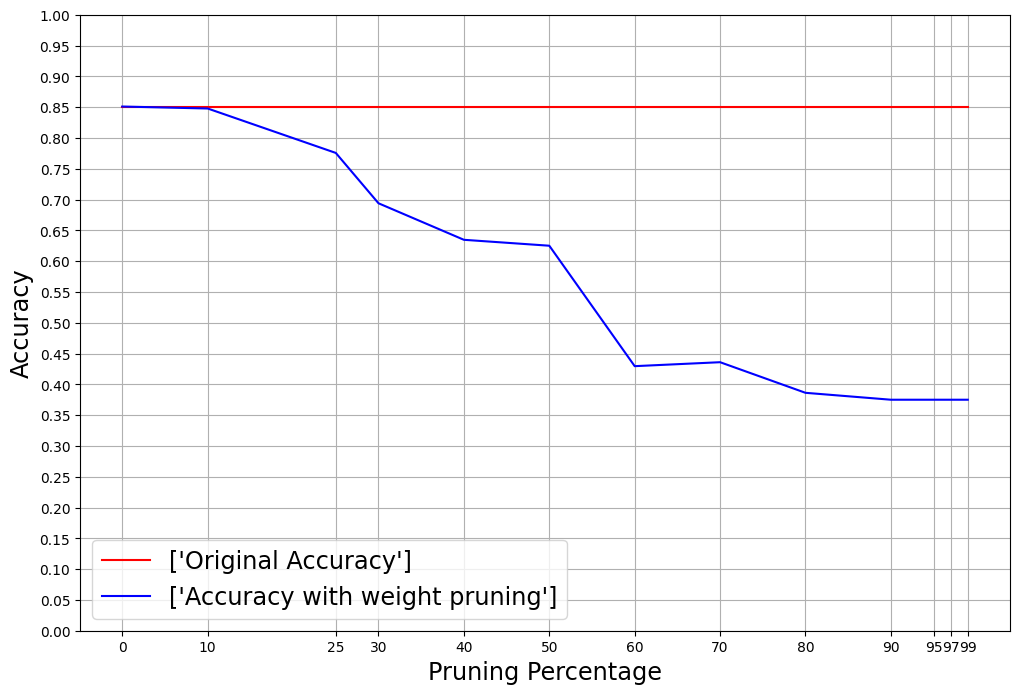

In [ ]:
from tqdm import tqdm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'],
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
accuracy_weight_pruning1 = []
for percent in pruning_percent:
    accuracy_weight_pruning1.append(accuracy_score(true_list, predict(model=weight_prune(model_list[1], percent, loader_test),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
original_accuracy1 = accuracy_score(true_list, pred_list2)
original_accuracy1

0.8766025641025641

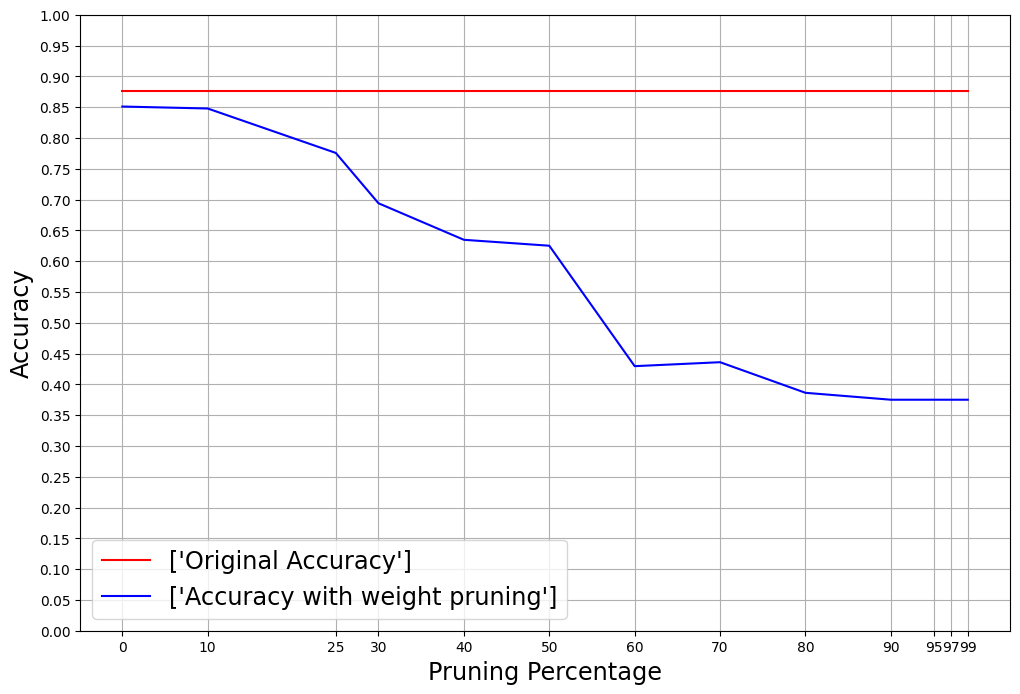

In [ ]:
from tqdm import tqdm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy1], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'],
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
accuracy_weight_pruning2 = []
for percent in pruning_percent:
    accuracy_weight_pruning2.append(accuracy_score(true_list, predict(model=weight_prune(model_list[2], percent, loader_test),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
original_accuracy2 = accuracy_score(true_list, pred_list3)
original_accuracy2

0.8782051282051282

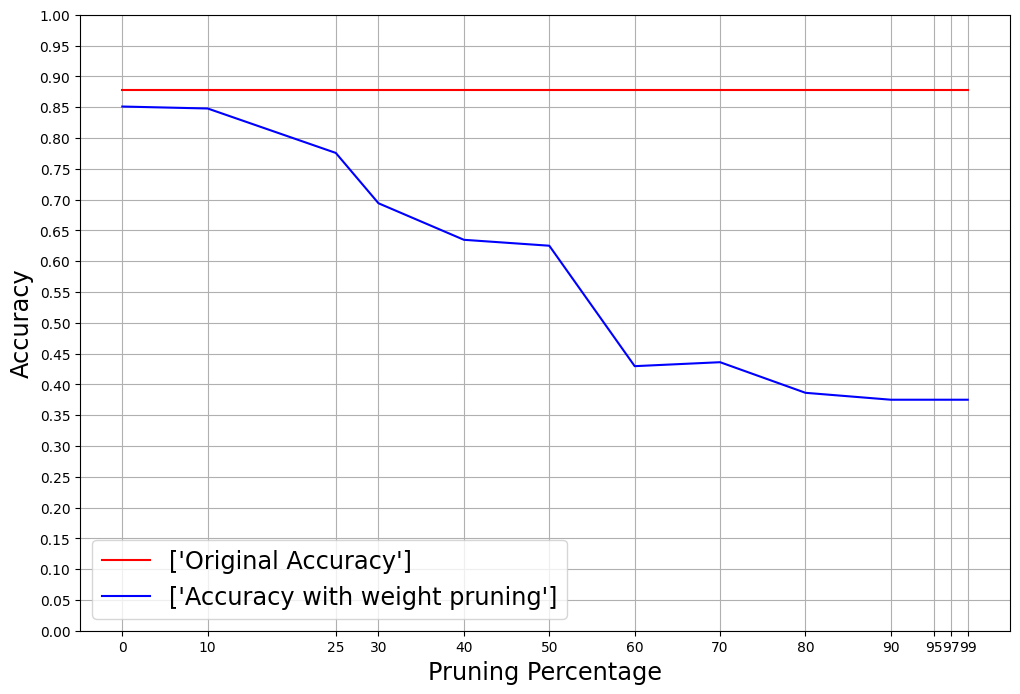

In [ ]:
from tqdm import tqdm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[original_accuracy2], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.grid()
plt.legend([['Original Accuracy'],
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='xx-large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
import copy
import numpy as np
import torch

def neuron_pruning(model, pruning_percentage):
    model1 = copy.deepcopy(model)  # Create a deep copy of the model
    length = len(list(model1.parameters()))  # Get the number of parameters

    # Iterate over model parameters
    for i, param in enumerate(model1.parameters()):
        # Consider only multi-dimensional parameters, excluding last two
        if len(param.size()) > 1 and i < length - 2:
            weight = param.detach().cpu().numpy()  # Convert to numpy
            norm = np.linalg.norm(weight, axis=0)  # Calculate norm along axis 0

            # If there's only one row/column, skip or handle appropriately
            if weight.shape[0] == 1 or weight.shape[1] == 1:
                continue  # Skip if indexing would cause out-of-bounds error

            # Obtain indices for pruning and validate
            indices = np.argwhere(norm < np.percentile(norm, pruning_percentage)).flatten()

            # Validate indices to avoid out-of-bounds errors
            if indices.size > 0 and np.any(indices >= weight.shape[1]):
                continue  # Skip if indices are out of bounds

            # Zero out weights at specified indices
            weight[:, indices] = 0  # Apply pruning by setting weights to zero

            # Convert back to PyTorch and update parameter data
            weight = torch.from_numpy(weight).to(device)
            param.data = weight  # Assign updated weights back to parameter

    return model1  # Return the pruned model
pruning_percent = [0, 10,25,30,40, 50, 60, 70, 80, 90, 95, 97, 99]

In [ ]:
accuracy_neuron_pruning = []
for percent in pruning_percent:
    accuracy_neuron_pruning.append(accuracy_score(true_list, predict(model=neuron_pruning(model_list[0], percent),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
accuracy_neuron_pruning1 = []
for percent in pruning_percent:
    accuracy_neuron_pruning1.append(accuracy_score(true_list, predict(model=neuron_pruning(model_list[1], percent),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
accuracy_neuron_pruning2 = []
for percent in pruning_percent:
    accuracy_neuron_pruning2.append(accuracy_score(true_list, predict(model=neuron_pruning(model_list[2], percent),loader_test=loader_test,return_true=False)))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [ ]:
accuracy_weight_pruning

[0.8509615384615384,
 0.8477564102564102,
 0.7756410256410257,
 0.6939102564102564,
 0.6346153846153846,
 0.625,
 0.42948717948717946,
 0.4358974358974359,
 0.38621794871794873,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
accuracy_weight_pruning1

[0.8766025641025641,
 0.8766025641025641,
 0.8413461538461539,
 0.7948717948717948,
 0.7227564102564102,
 0.625,
 0.625,
 0.625,
 0.625,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
accuracy_weight_pruning2

[0.8782051282051282,
 0.8766025641025641,
 0.8237179487179487,
 0.7708333333333334,
 0.7035256410256411,
 0.625,
 0.625,
 0.625,
 0.625,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
accuracy_neuron_pruning

[0.8509615384615384,
 0.6233974358974359,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
accuracy_neuron_pruning1

[0.8766025641025641,
 0.625,
 0.625,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375]

In [ ]:
accuracy_neuron_pruning2

[0.8782051282051282,
 0.625,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375]